In [41]:
import pickle
import pandas as pd
from pybedtools import BedTool
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [2]:
with open("../H3K27me3/lncRNA_All_Peaks_Correlations_corrected.pickle", 'rb') as f:
    corr = pickle.load(f)

In [2]:
chip = pd.read_csv("../H3K27me3/peaks/peaks_signal_matrix_normalized.csv", sep="\t", index_col=0)

In [6]:
chip.shape

(277972, 77)

In [43]:
zeros = []
for row in chip.iterrows():
    zeros.append(len([i for i in row[1] if i == 0]))

In [3]:
lncRNA = pd.read_csv("../H3K27me3/lncRNA_matrix_filtered_normalized.csv", sep="\t", index_col=0)

In [3]:
meg3 = [(g, p, sr[0]) for l in corr for g, p, sr in l if g == "ENSG00000214548.10"]

In [4]:
len(meg3)

1631

In [5]:
meg3[0]

('ENSG00000214548.10', 'peak_232', -0.5352970417556576)

(array([ 51., 773.,  26.,   0.,   0.,   0.,   0.,   0., 731.,  50.]),
 array([-0.67065437, -0.5367472 , -0.40284004, -0.26893288, -0.13502571,
        -0.00111855,  0.13278862,  0.26669578,  0.40060295,  0.53451011,
         0.66841728]),
 <a list of 10 Patch objects>)

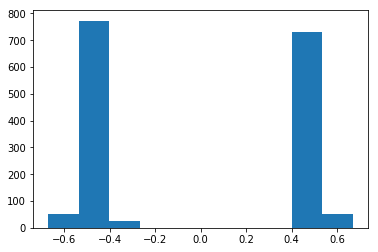

In [8]:
plt.hist([c for g, p, c in meg3])

In [6]:
peaks = pd.read_csv("../H3K27me3/peaks/merged_peaks.bed", sep="\t", header=None)

In [7]:
peaks.head()

,0,1,2,3
0,chr1,10341,10640,peak_0
1,chr1,54315,55724,peak_1
2,chr1,56893,57208,peak_2
3,chr1,60654,60893,peak_3
4,chr1,61834,62068,peak_4


In [8]:
meg3Peaks = peaks[peaks[3].isin([p for g, p, c in meg3])]

In [10]:
meg3Peaks.to_csv("../H3K27me3/meg3Peaks.bed", sep="\t", index=None, header=None)

In [20]:
#посмотреть рядом(closest bed)
meg3_bed = BedTool("../H3K27me3/MEG3-bound_peaks_hg19based_sorted.bed")#6837
bt = BedTool.from_dataframe(meg3Peaks)

In [21]:
closest = meg3_bed.closest(bt, d=True).to_dataframe()

In [14]:
closest[closest['itemRgb'] <= 1000].shape

(65, 9)

In [15]:
closest[closest['itemRgb'] == 0].shape

(61, 9)

(array([   3.,    9.,   15.,   33.,   51.,  146.,  250.,  536.,  953.,
        1458., 1479.,  837.,  406.,  277.,  323.]),
 array([2.56702637, 2.93326634, 3.29950632, 3.6657463 , 4.03198627,
        4.39822625, 4.76446623, 5.13070621, 5.49694618, 5.86318616,
        6.22942614, 6.59566611, 6.96190609, 7.32814607, 7.69438604,
        8.06062602]),
 <a list of 15 Patch objects>)

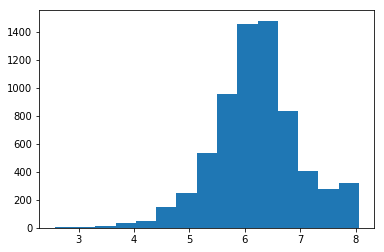

In [16]:
plt.hist(np.log10(closest[closest['itemRgb'] != 0]['itemRgb']), bins=15)

In [ ]:
#======================================================================================================================

In [47]:
coresp = pd.read_csv("../H3K27me3/H3K27me3_filtered_by_biosample.csv", sep=";")
listRnaExpOrder = []
for exp in list(chip.columns.values):
    listRnaExpOrder.append(coresp[coresp['File accession'] == exp]['RNA file assesion'].values[0])

In [48]:
lncRNA = lncRNA.reindex(columns=listRnaExpOrder)

In [49]:
meg3_exp = lncRNA[lncRNA.index == 'ENSG00000214548.10']

In [23]:
meg3_chip = chip[chip.index.isin([p for g, p, c in meg3])]

In [59]:
#Посмотрим на значения экспериментов в пиках подробнее

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 7.000e+00, 6.000e+00,
        8.000e+00, 8.000e+00, 2.200e+01, 1.578e+03]),
 array([22. , 27.5, 33. , 38.5, 44. , 49.5, 55. , 60.5, 66. , 71.5, 77. ]),
 <a list of 10 Patch objects>)

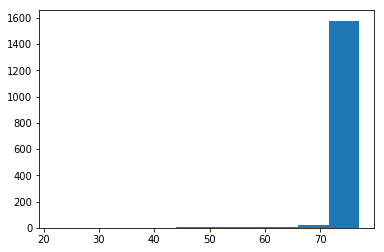

In [31]:
#кол-во нулей в экспериментах
plt.hist(meg3_chip.apply(lambda row: len([i for i in row if i > 0]), axis=1))

In [38]:
#Есть ли meg3 пики среди наших пиков?
meg3_bed = BedTool("../H3K27me3/MEG3-bound_peaks_hg19based_sorted.bed")#6837
bt_all_peaks = BedTool.from_dataframe(peaks)
closest_with_all = meg3_bed.closest(bt_all_peaks, d=True).to_dataframe()

closest_with_all[closest_with_all['itemRgb'] == 0].shape

(6024, 9)

In [44]:
peaks_intersect_with_meg3_exp = closest_with_all[closest_with_all['itemRgb'] == 0]['thickEnd'].tolist()
peaks_intersect_with_meg3_exp_chip = chip[chip.index.isin(peaks_intersect_with_meg3_exp)]

In [45]:
peaks_intersect_with_meg3_exp_chip.head()

,ENCFF591ZGI,ENCFF947QKE,ENCFF105XNT,ENCFF573NUY,ENCFF411ZSE,ENCFF944ISC,ENCFF317HDL,ENCFF808YRG,ENCFF153UOO,ENCFF442NTT,...,ENCFF149NHO,ENCFF379GQG,ENCFF730WFM,ENCFF100ZMU,ENCFF323ZZH,ENCFF803QNX,ENCFF876PEW,ENCFF956AVR,ENCFF133ZMV,ENCFF269WXR
peak_0,8.36,0.00,0.00,0.00,0.00,0.91,0.00,0.77,0.00,5.22,...,0.00,0.65,0.00,2.11,0.00,0.00,4.48,7.40,0.00,0.00
peak_24,309.34,550.95,170.83,219.28,647.61,465.44,406.80,398.96,454.85,204.21,...,548.10,649.44,533.04,746.28,405.94,485.03,194.72,4310.02,185.79,528.90
peak_39,196.47,166.62,83.03,75.41,161.52,162.99,127.52,139.64,125.11,94.89,...,136.05,172.58,360.59,209.15,94.01,107.09,82.81,766.16,71.68,129.35
peak_115,3448.73,5008.78,1820.91,1883.19,4816.30,3642.01,4143.28,2719.82,3574.51,1370.48,...,5562.60,6867.44,5413.51,3700.76,3016.81,3278.71,1227.65,17204.59,1583.47,2854.32
peak_118,221.55,86.24,100.21,38.70,121.52,98.70,99.47,148.84,67.82,102.26,...,97.18,88.24,296.31,124.12,76.92,44.09,79.46,346.10,49.98,158.09


In [68]:
meg3_exp = lncRNA.loc['ENSG00000214548.10', :].tolist()

In [70]:
#посмотреть как коррелирует мег3 с этими(нашими) пиками
corrs = []
for index, row in peaks_intersect_with_meg3_exp_chip.iterrows():
    corrs.append(stats.spearmanr(meg3_exp, row.tolist()))

(array([   9.,   70.,  267.,  791., 1505., 1449.,  753.,  247.,   61.,
          13.]),
 array([-0.56956122, -0.45447224, -0.33938327, -0.22429429, -0.10920532,
         0.00588366,  0.12097263,  0.23606161,  0.35115058,  0.46623956,
         0.58132853]),
 <a list of 10 Patch objects>)

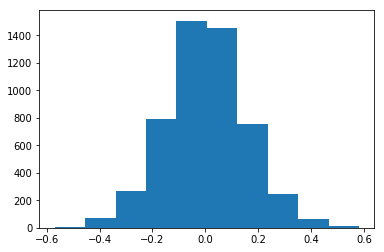

In [71]:
#Видим что хоть пики и есть, но корреляции тупо нет
plt.hist([c for c, p in corrs])

In [75]:
#пересчитать в их пиках наши риды и опять попробовать корреляцию
#(с экспрессией ничего не можем сделать, а вот пошевелить чип можем, потому что пики сами делали, а так их пики берем
#а данные наши)

In [ ]:
#===================теперь возьмем матрицу сигнала, посчитанную для экспериментальных пиков с нашими данными

In [93]:
chip_peaks_exp = pd.read_csv("../H3K27me3/MEG3_exp_peaks_signal_matrix_normalized.csv", sep=",", index_col=0)

In [94]:
chip_peaks_exp.head()

,ENCFF591ZGI,ENCFF947QKE,ENCFF105XNT,ENCFF573NUY,ENCFF411ZSE,ENCFF944ISC,ENCFF317HDL,ENCFF808YRG,ENCFF153UOO,ENCFF442NTT,...,ENCFF149NHO,ENCFF379GQG,ENCFF730WFM,ENCFF100ZMU,ENCFF323ZZH,ENCFF803QNX,ENCFF876PEW,ENCFF956AVR,ENCFF133ZMV,ENCFF269WXR
MACS_pk6147,8.57,0.00,0.75,0.00,0.00,0.96,0.00,1.15,0.00,24.35,...,2.47,0.35,0.00,1.06,0.0,0.00,14.15,1.61,0.00,0.00
MACS_pk6155,0.00,0.00,0.00,2.12,0.00,0.00,0.00,0.00,0.00,3.25,...,0.00,0.00,0.00,1.32,0.0,0.00,0.00,0.00,0.00,0.00
MACS_pk6162,8.57,22.26,0.00,2.12,9.11,5.74,2.69,6.92,2.85,13.80,...,0.00,6.31,2.37,2.11,0.0,9.90,4.04,10.94,7.77,5.83
MACS_pk6173,34.29,3.71,2.26,2.12,5.06,11.48,8.07,14.99,0.95,12.17,...,9.89,11.57,13.42,15.59,10.0,8.66,6.06,6.12,8.63,1.46
MACS_pk6183,17.14,8.04,11.28,4.24,5.06,10.53,7.17,6.92,9.49,9.74,...,12.36,7.01,12.63,10.04,5.0,2.48,12.13,3.22,7.77,0.00


In [95]:
corrs_with_exp = []
for index, row in chip_peaks_exp.iterrows():
    corrs_with_exp.append(stats.spearmanr(meg3_exp, row.tolist()))

/home/mazurovev/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/mazurovev/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/mazurovev/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/mazurovev/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/mazurovev/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [96]:
corrs_with_exp = [x for x in [c for c, p in corrs_with_exp] if str(x) != 'nan']

In [97]:
len(corrs_with_exp)

6743

(array([  15.,   56.,  252.,  825., 1866., 2011., 1177.,  435.,   89.,
          17.]),
 array([-0.47070617, -0.37426854, -0.2778309 , -0.18139327, -0.08495564,
         0.01148199,  0.10791962,  0.20435726,  0.30079489,  0.39723252,
         0.49367015]),
 <a list of 10 Patch objects>)

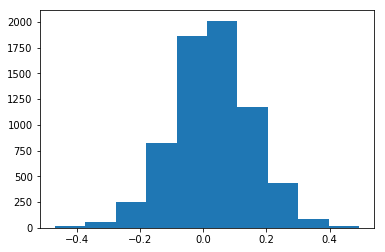

In [98]:
plt.hist(corrs_with_exp)

In [ ]:
#=================================возьмем данные chop seq и найдем пики сами

In [2]:
from subprocess import Popen, PIPE
import sys
def callWithNiceOutput(cmd):
    proc = Popen(cmd, stdout=PIPE, stderr=PIPE, shell=True, bufsize=-1)
    
    for line in proc.stdout:
        print("output: ")
        print(line)
        sys.stdout.flush()
    
    for line in proc.stderr:
        print("error: ")
        print(line)
        sys.stdout.flush()

In [5]:
cmd = "macs2 callpeak -t /home/mazurovev/MEG3_CHOPSeq/MEG3_ChOP.bam -c /home/mazurovev/MEG3_CHOPSeq/Input_ChOP.bam --broad -g 2.7e9 -q 0.05 -n macs2_original --broad-cutoff 0.05"


callWithNiceOutput(cmd)

error: 
b'INFO  @ Fri, 25 Oct 2019 16:35:41: \n'
error: 
b'# Command line: callpeak -t /home/mazurovev/MEG3_CHOPSeq/MEG3_ChOP.bam -c /home/mazurovev/MEG3_CHOPSeq/Input_ChOP.bam --broad -g 2.7e9 -q 0.05 -n macs2_original --broad-cutoff 0.05\n'
error: 
b'# ARGUMENTS LIST:\n'
error: 
b'# name = macs2_original\n'
error: 
b'# format = AUTO\n'
error: 
b"# ChIP-seq file = ['/home/mazurovev/MEG3_CHOPSeq/MEG3_ChOP.bam']\n"
error: 
b"# control file = ['/home/mazurovev/MEG3_CHOPSeq/Input_ChOP.bam']\n"
error: 
b'# effective genome size = 2.70e+09\n'
error: 
b'# band width = 300\n'
error: 
b'# model fold = [5, 50]\n'
error: 
b'# qvalue cutoff for narrow/strong regions = 5.00e-02\n'
error: 
b'# qvalue cutoff for broad/weak regions = 5.00e-02\n'
error: 
b'# The maximum gap between significant sites is assigned as the read length/tag size.\n'
error: 
b'# The minimum length of peaks is assigned as the predicted fragment length "d".\n'
error: 
b'# Larger dataset will be scaled towards smaller dataset.\n

In [7]:
meg3_peaks = pd.read_csv("../MEG3_CHOPSeq/macs2_original_peaks.broadPeak", header=None, sep="\t")

In [8]:
meg3_peaks.shape

(29020, 9)

/home/mazurovev/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mazurovev/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


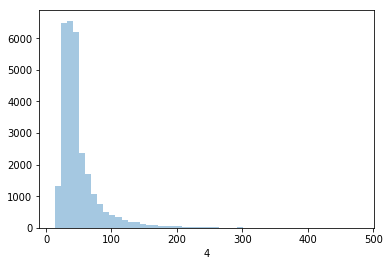

In [10]:
sb.distplot(meg3_peaks[4], kde=False)

In [42]:
import h5py
with h5py.File("../all_marks/" + "H3K27me3" + "/lncRNA_Peaks_corrs/lncRNA_Peaks_Correlations_corrected_non_zero.hdf5", 'r') as f:
    corrs = f['corrs_matrix'][:]
    lncRNAs = f['lncRNAs_names'][:]

In [43]:
corrs.shape

(1401, 267955)

In [44]:
list(lncRNAs).index("ENSG00000214548")

99

In [45]:
len(corrs[99, :].nonzero()[0])

64

In [46]:
h3k27me3_peaks = pd.read_csv("../all_marks/H3K27me3/merged_peaks_first_in_biosample.bed", header=None, sep="\t")

In [47]:
h3k27me3_peaks.iloc[corrs[99, :].nonzero()[0]]

,0,1,2,3
11661,chr1,162764958,162770470,peak_11661
17713,chr1,231601589,231602455,peak_17713
18712,chr1,239975661,239978555,peak_18712
19263,chr1,246721962,246727697,peak_19263
32226,chr11,436491,446866,peak_32226
34379,chr11,27530372,27536565,peak_34379
37275,chr11,66365254,66385342,peak_37275
42425,chr11,121509943,121569083,peak_42425
45005,chr12,20140726,20147461,peak_45005
51305,chr12,85467345,85468660,peak_51305


In [58]:
liftover_our_meg3_peaks = pd.read_csv("/home/mazurovev/MEG3_CHOPSeq/hglft_genome_4e3f1_366420.bed", sep="\t", header=None)

In [60]:
meg3_bed = BedTool("../MEG3_CHOPSeq/macs2_original_peaks.broadPeak")
bt = BedTool.from_dataframe(liftover_our_meg3_peaks)
closest = meg3_bed.closest(bt, d=True).to_dataframe()

/usr/local/lib/python3.6/dist-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 14 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


In [68]:
len(closest[(closest[13] < 60000) & (closest[13] != -1)])

56